In [1]:
### importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing All models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### importing Data preprocessing tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### importing metrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(rc = {'figure.figsize':(15,8)})
%matplotlib inline

# Data Analysis and Visualization


In [2]:
df = pd.read_csv('winequality-red.csv')
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

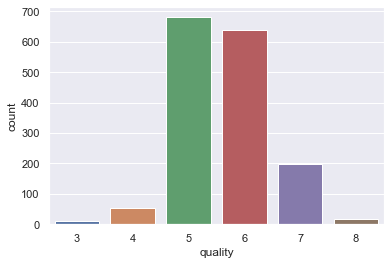

In [6]:
sns.countplot(x='quality', data=df)

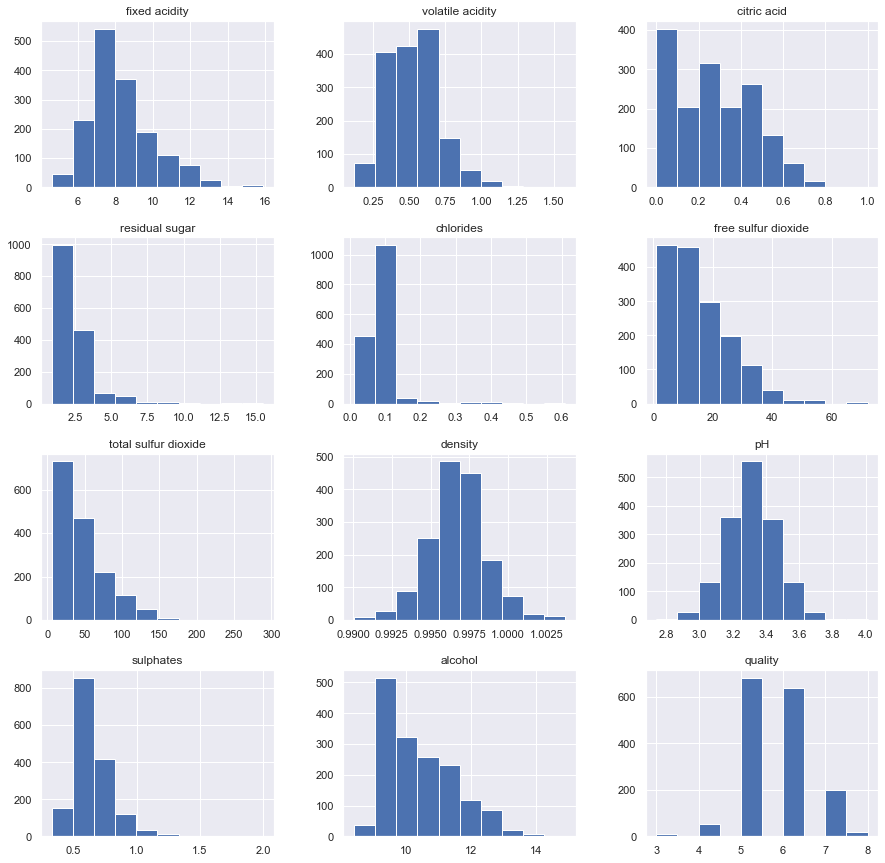

In [7]:
df.hist(figsize=(15,15))
plt.show()

<AxesSubplot:ylabel='quality'>

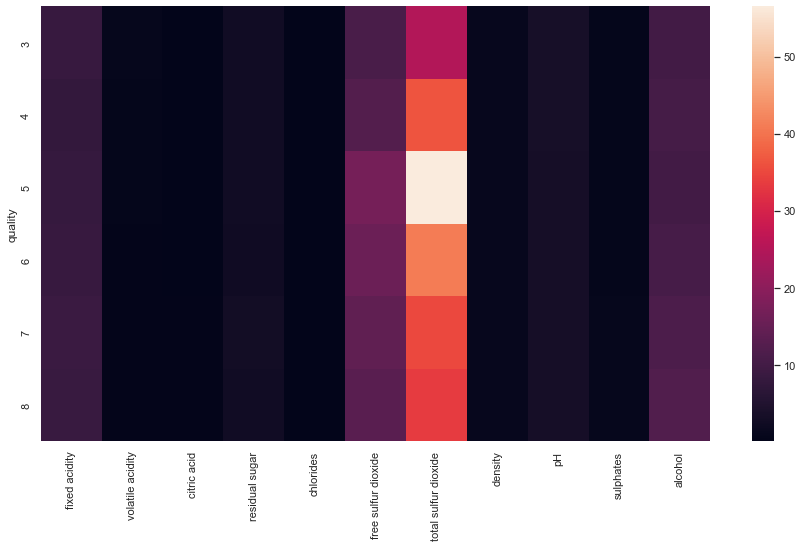

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.groupby('quality').mean())

<AxesSubplot:>

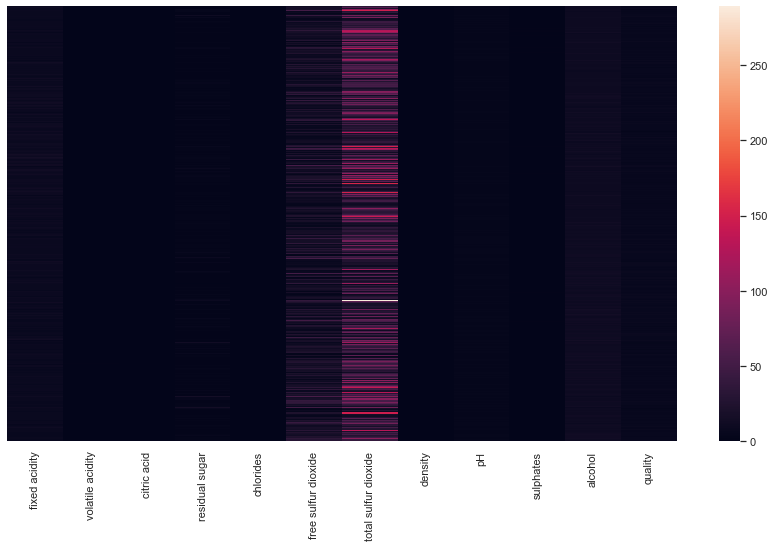

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df, yticklabels=False)

# Data preprocessing

In [10]:
df = df.loc[(df.quality != 3) & (df.quality != 8) & (df.quality != 4)]

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Model Selection and Apply

In [15]:
models=[LogisticRegression(max_iter=1000),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=15),RandomForestClassifier(),
       DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}


C:\Users\Nayan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
new_df = pd.DataFrame(d)
new_df

,Modelling Algo,Accuracy
0,LogisticRegression,0.611842
1,LinearSVM,0.598684
2,rbfSVM,0.653509
3,KNearestNeighbors,0.616228
4,RandomForestClassifier,0.721491
5,DecisionTree,0.671053
6,GradientBoostingClassifier,0.688596
7,GaussianNB,0.583333


In [17]:
### to find the best value of K for KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

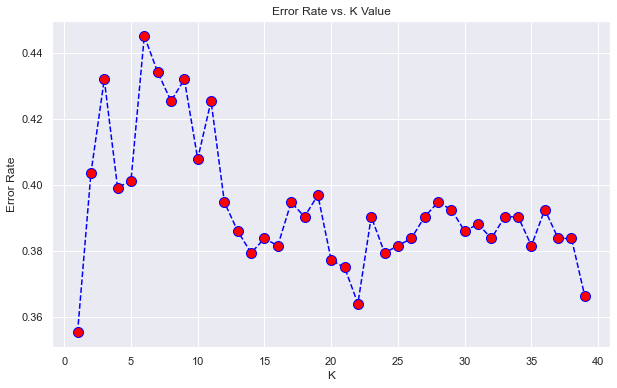

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

C:\Users\Nayan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nayan\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


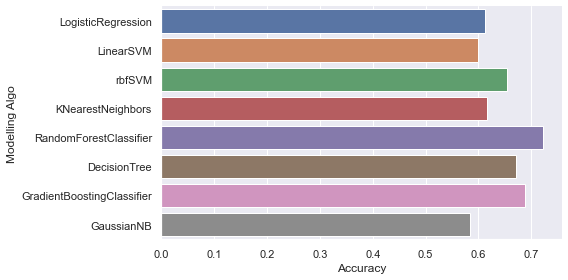

In [19]:
### result comperision
sns.factorplot(y='Modelling Algo', x='Accuracy', data=new_df,kind='bar', size=4, aspect=2)

In [20]:
### cause RandomForestClassifier having the best accuricy 
classifier  = RandomForestClassifier()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [21]:
print(accuracy_score(y_test, ypred))
print('\n')
print(confusion_matrix(y_test, ypred))
print('\n')
print(classification_report(y_test, ypred))

0.7149122807017544


[[166  37   2]
 [ 54 122  17]
 [  4  16  38]]


              precision    recall  f1-score   support

           0       0.74      0.81      0.77       205
           1       0.70      0.63      0.66       193
           2       0.67      0.66      0.66        58

    accuracy                           0.71       456
   macro avg       0.70      0.70      0.70       456
weighted avg       0.71      0.71      0.71       456



<AxesSubplot:>

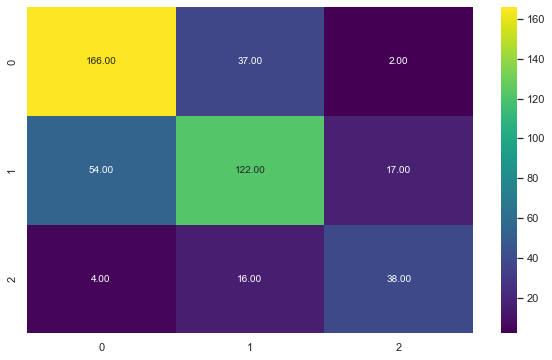

In [22]:
### 5 --> 0
### 6 --> 1
### 7 --> 2
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, cmap='viridis', fmt='0.2f')